In [293]:
# Import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
# Simple Linear Regression

In [203]:
df = pd.read_csv("HousePrice.csv")
df

,Area,Price
0,1030,580000
1,1600,718000
2,1900,800000
3,2500,1100000
4,2800,1200000
5,3373,1590000


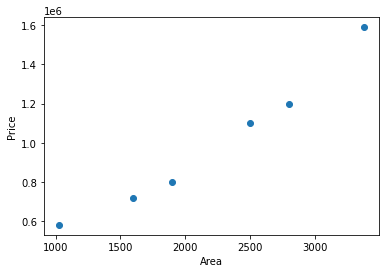

In [207]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.Area,df.Price)

In [358]:
#Import library for linear regression
from sklearn import linear_model

In [359]:
# Define the linear regression model
reg = linear_model.LinearRegression()

In [360]:
# Fit with the data
model = reg.fit(df[['Area']],df.Price)

In [361]:
# y=β1x1+β0 
# House price = β1*Area + β0

In [362]:
# coefficient β1
model.coef_

array([428.73798554])

In [363]:
# intercept β0
model.intercept_

54562.06281367235

In [364]:
# Predict the first row - Area : 1030
428.73798554*1030 + 54562.06281367235

496162.18791987235

In [365]:
model.predict(df[['Area']])

array([ 496162.18792247,  740542.83968171,  869164.23534447,
       1126407.02666999, 1255028.42233274, 1500695.28804861])

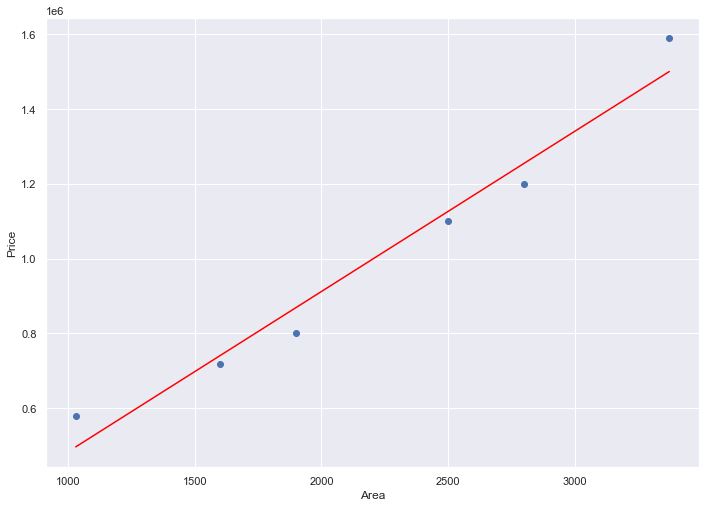

In [366]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.Area,df.Price)
plt.plot(df.Area, model.predict(df[['Area']]), color = 'red')

In [367]:
# Multiple Linear Regression - Predict price of houses in Boston

In [368]:
# Load the Boston Housing Dataset from sklearn.datasets
from sklearn.datasets import load_boston
boston = load_boston()

In [369]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [370]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [371]:
#Feature names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [372]:
# Transfrom the dataset into a data frame
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [373]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [374]:
boston_df['MEDV'] = boston.target

In [375]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [376]:
#Get some statistics from the dataset, count, mean
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [377]:
# Check the number of nulls
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [378]:
boston_df.shape

(506, 14)

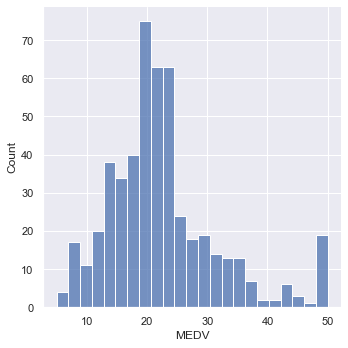

In [379]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(boston_df['MEDV'])

<AxesSubplot:>

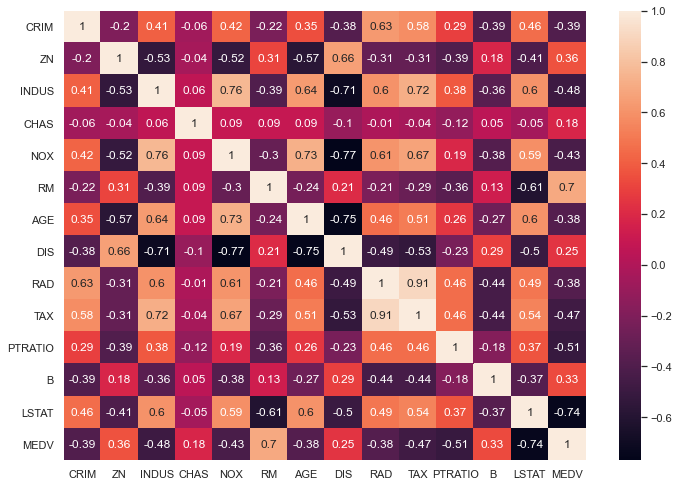

In [381]:
# Correlation Matrix
correlation_matrix = boston_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot = True)

In [382]:
#The correlation coefficient ranges from -1 to 1. 
#If the value is close to 1, it means that there is a strong positive correlation between the two variables. 
#When it is close to -1, the variables have a strong negative correlation.

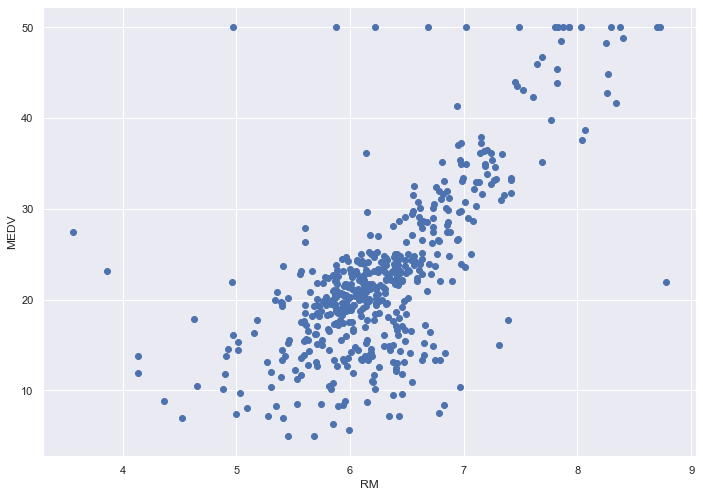

In [383]:
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.scatter(boston_df['RM'],boston_df['MEDV'])

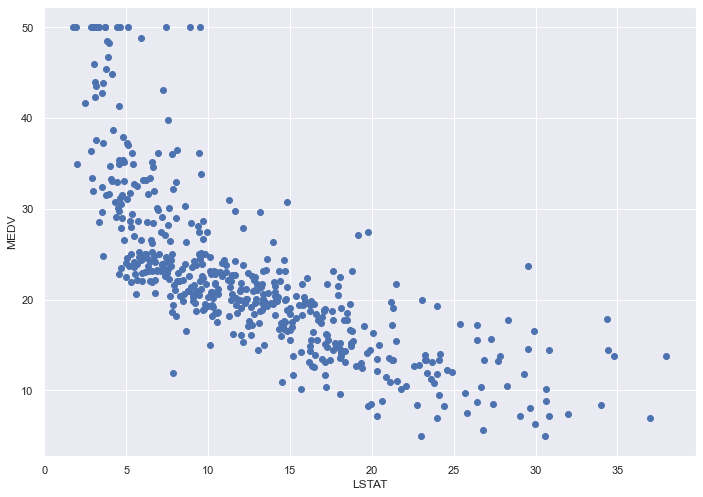

In [384]:
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.scatter(boston_df['LSTAT'],boston_df['MEDV'])

In [385]:
#Set independent and dependent variables
X = pd.DataFrame(np.c_[boston_df['RM'],boston_df['LSTAT']],columns = ['RM','LSTAT'])
Y = boston_df['MEDV']

In [386]:
# Linear Regression Model
reg = linear_model.LinearRegression()

In [387]:
model = reg.fit(X, Y)

In [388]:
print(model.coef_)

[ 5.09478798 -0.64235833]


In [389]:
print(model.intercept_)

-1.3582728118745102


In [351]:
# Multiple Linear Regression y = β1x1 + β2x2 +⋯+ βnxn
# Predict_Price = β0 + β1*RM + β2*'LSTAT'

In [352]:
# Predict_Price = -1.3582728118745102 + 5.09478798*RM -0.64235833*'LSTAT'

In [398]:
# House price to predict
rm = input('How many rooms? \n')
lstat = input('What is percentage of lower status of the population? \n')

print('We predict house price will be {:.2f} thousand'.format(
        model.predict([[float(rm), float(lstat)]])[0],rm,lstat))

How many rooms? 
5
What is percentage of lower status of the population? 
5
We predict house price will be 20.90 thousand


In [394]:
-1.3582728118745102 + 5.09478798*5 -0.64235833*5

20.903875438125493

In [400]:
# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)
r2

0.6385616062603403